### imports

In [1]:
import torch
import numpy as np

import env
from utils import plot_learning_curves

%matplotlib inline
%load_ext autoreload
%autoreload 2

## load optimizer data

In [2]:
checkpoint = torch.load('../models/0.9416-312.ckpt', map_location={'cuda:0': 'cpu'})

## plot

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


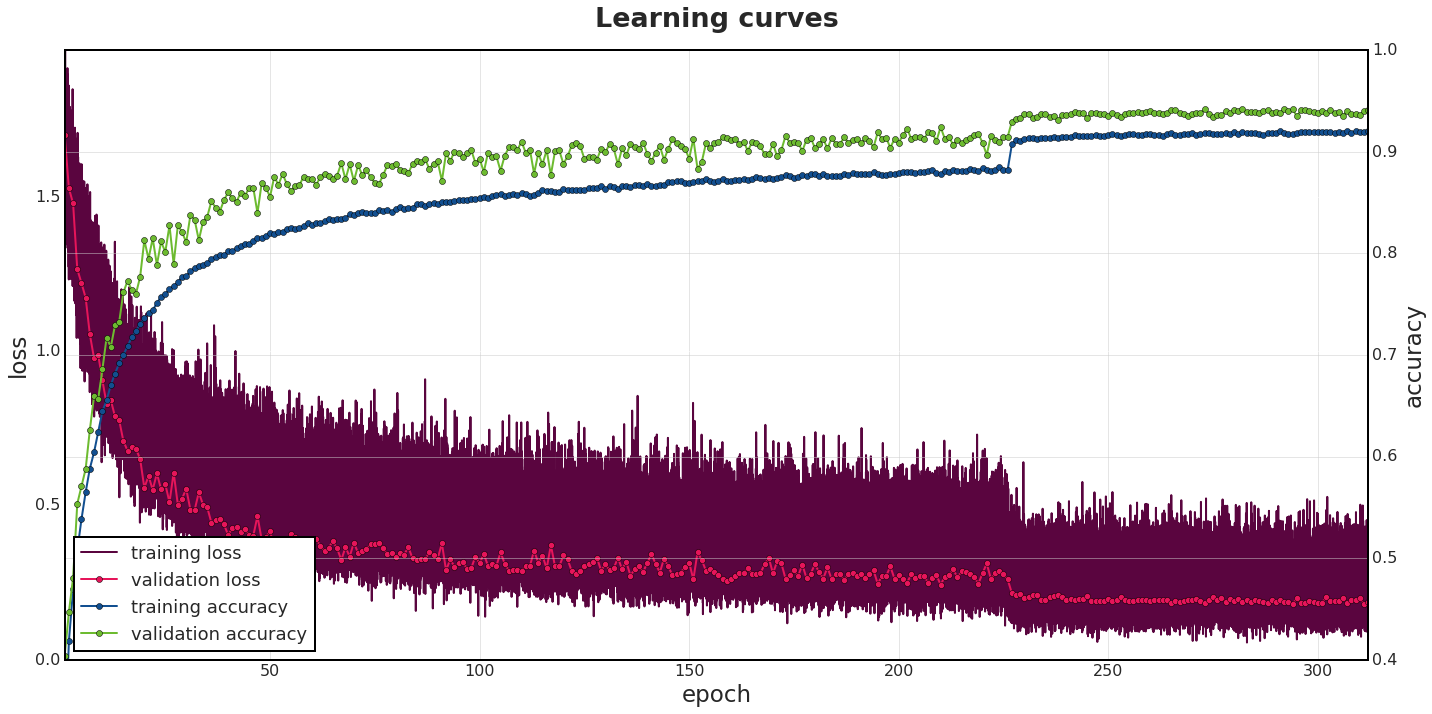

In [3]:
train_loss_history = checkpoint['train_loss']
val_loss_history = [np.mean(v) for v in checkpoint['val_loss']]
train_acc_history = checkpoint['train_acc']
val_acc_history = checkpoint['val_acc']

plot_learning_curves(train_loss_history, train_acc_history, 
                     val_loss_history, val_acc_history)